In [ ]:
pip install scikit-optimize numpy matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.6 MB/s eta 0:00:00


Optimal Alpha (Bayesian Optimization): 0.64


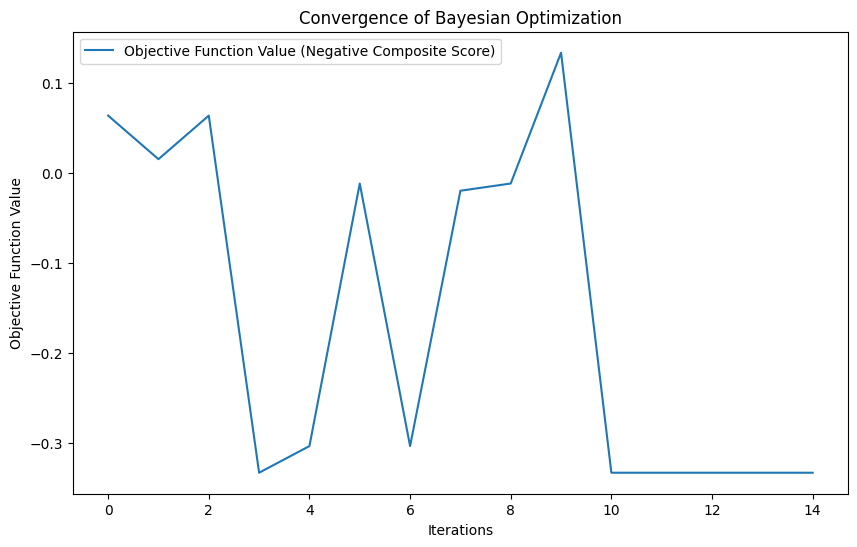

In [ ]:
import numpy as np
import pandas as pd
from skopt import gp_minimize
from skopt.space import Real
import matplotlib.pyplot as plt

# Load the CSV file containing the alpha values and metrics
data = pd.read_csv('/content/parameters.csv')

# Extract columns
alphas = data['alpha']
lane_consistency = data['Lane Detection Consistency']
offset_stability = data['Average Offset Stability']
fps = data['Average FPS']

# Normalize the metrics
norm_offset = 1 - (offset_stability - offset_stability.min()) / (offset_stability.max() - offset_stability.min())  # Smaller is better
norm_fps = (fps - fps.min()) / (fps.max() - fps.min())  # Larger is better

# Composite Score Calculation (Equal weights for FPS and Offset Stability)
def compute_composite_score(alpha):
    # For Bayesian optimization, we must define a function to minimize
    # Calculate the composite score for a given alpha
    norm_offset = 1 - (offset_stability - offset_stability.min()) / (offset_stability.max() - offset_stability.min())  # Smaller is better
    norm_fps = (fps - fps.min()) / (fps.max() - fps.min())  # Larger is better
    composite_score = 0.5 * norm_fps - 0.5 * norm_offset  # Composite score formula

    # Interpolation of the alpha value to find the corresponding composite score
    idx = np.argmin(np.abs(alphas - alpha))
    return -composite_score[idx]  # Return negative for minimization

# Define the search space for alpha (between 0.1 and 1)
search_space = [Real(0.1, 1.0, name='alpha')]

# Perform Bayesian optimization using gp_minimize
result = gp_minimize(compute_composite_score,  # The objective function to minimize
                     search_space,             # The parameter space to search over
                     n_calls=15,               # Number of evaluations
                     random_state=42)

# Extract the optimal alpha
optimal_alpha = result.x[0]
print(f"Optimal Alpha (Bayesian Optimization): {optimal_alpha:.2f}")

# Plot the convergence of the optimization
plt.figure(figsize=(10, 6))
plt.plot(result.func_vals, label='Objective Function Value (Negative Composite Score)')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.title('Convergence of Bayesian Optimization')
plt.legend()
plt.show()


alpha
0.0    63
0.1    63
0.2    63
0.3    63
0.4    63
0.5    63
0.6    63
0.7    63
0.8    63
0.9    63
1.0    63
Name: count, dtype: int64
   alpha  Frame  Offset
0    0.0     10    0.00
1    0.0     20  -13.22
2    0.0     30  -23.93
3    0.0     40  -22.92
4    0.0     50  -20.17


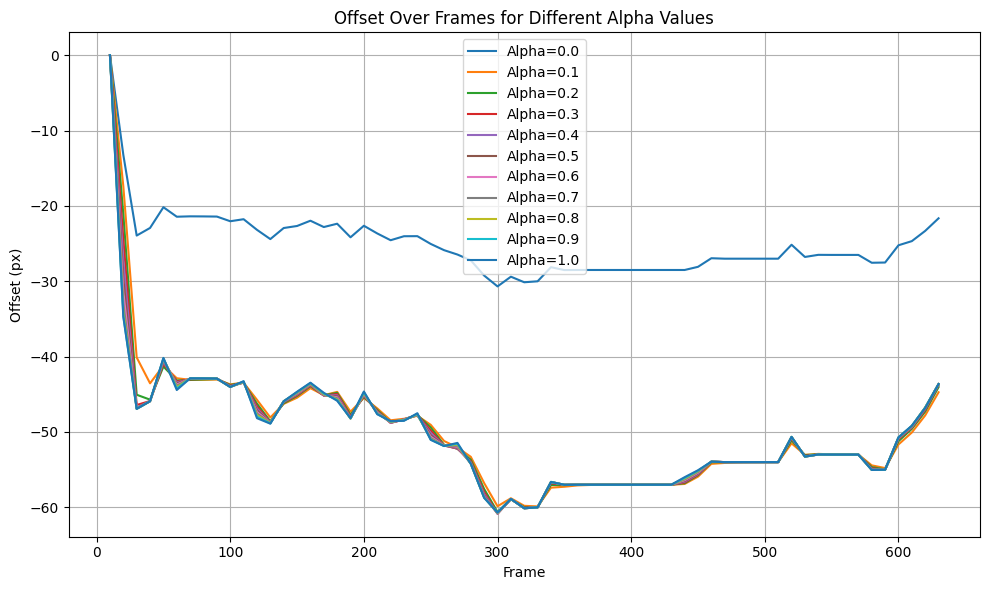

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List of file paths
file_paths = [
    "/content/alpha = 0.csv",
    "/content/alpha = 0.1.csv",
    "/content/alpha = 0.2.csv",
    "/content/alpha = 0.3.csv",
    "/content/alpha = 0.4.csv",
    "/content/alpha = 0.5.csv",
    "/content/alpha = 0.6.csv",
    "/content/alpha = 0.7.csv",
    "/content/alpha = 0.8.csv",
    "/content/alpha = 0.9.csv",
    "/content/alpha = 1.csv",
]

# Corresponding alpha values
alpha_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

parameter_data = {"alpha": [], "Frame": [], "Offset": []}

# Reading the data and adding alpha values
for i, file_path in enumerate(file_paths):
    try:
        alpha = alpha_values[i]
        df = pd.read_csv(file_path)

        # Check that the required columns exist in the CSV
        required_columns = {'Frame', 'Offset'}
        if not required_columns.issubset(df.columns):
            raise ValueError(f"Missing required columns in file: {file_path}")

        # Combine the data
        parameter_data["alpha"].extend([alpha] * len(df))
        parameter_data["Frame"].extend(df['Frame'])
        parameter_data["Offset"].extend(df['Offset'])
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

# Convert combined data to DataFrame
combined_data = pd.DataFrame(parameter_data)

# Debugging: Check how many entries we have for each alpha value
print(combined_data['alpha'].value_counts())  # Check how many rows for each alpha
print(combined_data.head())  # Preview the data

# Check if there are rows for all alpha values
for alpha in alpha_values:
    if combined_data[combined_data['alpha'] == alpha].empty:
        print(f"No data found for alpha {alpha}")

# Plotting Offset
plt.figure(figsize=(10, 6))
for alpha in alpha_values:
    subset = combined_data[combined_data['alpha'] == alpha]
    if not subset.empty:
        plt.plot(subset['Frame'], subset['Offset'], label=f'Alpha={alpha:.1f}')
plt.xlabel('Frame')
plt.ylabel('Offset (px)')
plt.title('Offset Over Frames for Different Alpha Values')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
